In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler

### ~ 1.1
DATA_FOLDER = 'CivilWarOnset/'
DATASET = DATA_FOLDER + "SambnisImp.csv"
CWD = pd.read_csv(DATASET, compression='infer', error_bad_lines=False)

# Project Milestone 2

To compare different Logistic Regression models performance in predicting Civil war onset in class imbalanced data, we first
load the provided dataset.
The binary variable 'y' used here for classification is the 'warstd' variable, which represents wether a civil war onset occured
for a given country in a given year. In total we have 7141 instances.

Using 10 fold cross-validation, the logistic regression models were trained on 9 folds of the data, then tested on 1 fold.
Cross validation is applied here as it produces unbiased and accurate error rates.

When loading the data for replication purposes, note that the authors only load most but not all the variables.
As instructed in the notes, here we selcet these specified variables to form X, the matrix of features. 

In [2]:
CWD = CWD[["warstds", "ager", "agexp", "anoc", "army85", "autch98", "auto4", "autonomy", "avgnabo", "centpol3", "coldwar", "decade1", "decade2", "decade3", "decade4", "dem", "dem4","demch98", "dlang","drel", "durable", "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590", "expgdp", "exrec", "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2", "geo34", "geo57", "geo69", "geo8", "illiteracy", "incumb", "infant", "inst", "inst3", "life", "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper", "mirps0", "mirps1", "mirps2", "mirps3", "nat_war", "ncontig", "nmgdp", "nmdp4_alt","numlang", "nwstate", "oil", "p4mchg", "parcomp", "parreg", "part", "partfree", "plural", "plurrel", "pol4", "pol4m", "pol4sq", "polch98","polcomp", "popdense", "presi", "pri", "proxregc", "ptime", "reg", "regd4_alt", "relfrac", "seceduc","second", "semipol3", "sip2", "sxpnew", "sxpsq", "tnatwar", "trade", "warhist", "xconst"]]

y = CWD["warstds"]

print("We check the structure of the Civil War Onset dataset by printing the first 5 rows of it as below: \n")
CWD.head()

We check the structure of the Civil War Onset dataset by printing the first 5 rows of it as below: 



,warstds,ager,agexp,anoc,army85,autch98,auto4,autonomy,avgnabo,centpol3,...,seceduc,second,semipol3,sip2,sxpnew,sxpsq,tnatwar,trade,warhist,xconst
0,0,34.461765,8.510845,0,129472.9042,0,3.925812,0.005151,0.432955,1,...,43.770298,0.253,0.058441,0.46176,0.158275,0.052989,0.443259,72.881375,0,3.995912
1,0,34.346348,8.478997,0,129413.0225,0,10.000000,0.000000,0.045052,1,...,43.588363,0.253,0.000000,0.00000,0.158321,0.052663,1.000000,72.900089,0,1.000000
2,0,77.000000,8.481015,0,130431.0145,0,10.000000,0.000000,0.030034,1,...,43.538181,0.253,0.000000,0.00000,0.158425,0.052891,2.000000,72.962880,0,1.000000
3,0,78.000000,8.451628,0,126781.6866,0,10.000000,0.000000,0.022526,1,...,43.490005,0.253,0.000000,0.00000,0.159006,0.052902,2.000000,73.102449,0,1.000000
4,0,79.000000,8.500172,0,130979.2470,0,10.000000,0.000000,0.022526,1,...,43.602238,0.253,0.000000,0.00000,0.158074,0.052706,2.000000,72.850389,0,1.000000


In [4]:
# Model 1: Fearon and Laitin (2003):
CWD_1 = CWD[["warhist", "ln_gdpen", "lpopns", "lmtnest", "ncontig", "oil", "nwstate", "inst3", "pol4", "ef", "relfrac"]]

print("For the first model 'Fearon and Laitin (2003)' we choose the relevant features from the feature matrix X, as instructed in the notes in order to replicate the results and predict the target in a similar way.\n")
print("\nWe check the structure of features for the first model by printing the first 5 rows of it as below: \n")
print(CWD_1.head())

# Model 2: Collier and Hoeffler (2004):
CWD_2 = CWD[["sxpnew", "sxpsq", "ln_gdpen", "gdpgrowth", "warhist", "lmtnest", "ef", "popdense", "lpopns", "coldwar", "seceduc","ptime"]]

print("\nFor the second model 'Collier and Hoeffler (2004)' we load the relevant features from the feature matrix X and check it out.\n")
print(CWD_2.head())

# Model 3: Hegre and Sambanis (2006):
CWD_3 = CWD[["lpopns", "ln_gdpen", "inst3", "parreg", "geo34", "proxregc", "gdpgrowth", "anoc", "partfree", "nat_war", "lmtnest", "decade1", "pol4sq", "nwstate", "regd4_alt", "etdo4590", "milper", "geo1", "tnatwar", "presi"]]

print("\n For the third logistic regresssion model 'Collier and Hoeffler (2004)' we do the same, load the relevant features from the feature matrix X and check it out.\n")
print(CWD_3.head())


For the first model 'Fearon and Laitin (2003)' we choose the relevant features from the feature matrix X, as instructed in the notes in order to replicate the results and predict the target in a similar way.


We check the structure of features for the first model by printing the first 5 rows of it as below: 

   warhist  ln_gdpen     lpopns   lmtnest  ncontig  oil  nwstate     inst3  \
0        0  0.851709  16.094110  4.198705      0.0    0      0.0  0.120897   
1        0 -1.639897  16.116295  4.198705      0.0    0      0.0  0.000000   
2        0 -1.629641  16.138290  4.198705      0.0    0      0.0  0.000000   
3        0 -1.639897  16.252539  4.198705      0.0    0      0.0  0.000000   
4        0 -1.398367  16.270645  4.198705      0.0    0      0.0  0.000000   

        pol4        ef  relfrac  
0   0.070117  0.750797   0.2718  
1 -10.000000  0.750797   0.2718  
2 -10.000000  0.750797   0.2718  
3 -10.000000  0.750797   0.2718  
4 -10.000000  0.750797   0.2718  

For the second

In [5]:
X_train_1 = CWD_1                        
scaler_1 = StandardScaler().fit(X_train_1)
X_1 = scaler_1.transform(X_train_1)

#LogisticRegression from sklearn:
model_1_unpen = LogisticRegression(penalty = 'none', random_state = 0, max_iter = 10000)
model_1_unpen.fit(X_1, y)
 
y_pred_1_unpen = cross_val_predict(model_1_unpen, X_1, y, cv=10, method = 'predict_proba')
fpr_1_unpen, tpr_1_unpen, thresholds_1_unpen = metrics.roc_curve(y, y_pred_1_unpen[:,1])

model_1_pen = LogisticRegression(penalty = 'l2', random_state = 0, max_iter = 10000)
model_1_pen.fit(X_1, y)

y_pred_1_pen = cross_val_predict(model_1_pen, X_1, y, cv=10, method = 'predict_proba')
fpr_1_pen, tpr_1_pen, thresholds_1_pen = metrics.roc_curve(y, y_pred_1_pen[:,1])

roc_auc_1_unpen = roc_auc_score(y, y_pred_1_unpen[:,1])
roc_auc_1_pen  =  roc_auc_score(y, y_pred_1_pen[:,1])
# print('Area ROC Fearon and Laitin (2003) Unpenalized =', roc_auc_1_unpen) 
# print('Area ROC Fearon and Laitin (2003) Penalized =', roc_auc_1_pen) 

To build the models, we first standardize the data used for each model, as we see by checking the data that the features have different ranges of magnitude in their values.

Then we start building the first logistic regression model corresponding to the unpenalized case of 'Fearon and Laitin (2003)'.
We use the Logistic Regression function from SKlearn library and we pass it the parameter 'penalty = none', to ensure that no regularization is done when building this model.

After this we fit the model using the extracted features from the Civil War Dataset and the target variable 'y'.
Following this, we use the 'cross_val_predict' function to predict the probabilities for each class (0 and 1), with 10 fold cross-validation.
Finally, we extract only the positive values of the returned probabilities and use them together with the trget variable 'y' to calculate the False positive rate (FPR), True positive rate (TPR) and Area under curve (AUC) scores of the predictions.

To evaluate the penalized version of this model, we repeat the same steps mentioned above, and instead of passing 'penalty = none' to the Logistic Regression function, we pass 'penalty = l2', to do L2 regularization.
Note that here for the penalized version of all models, we used L2 regularization instead of Firth regularization, as instructed to.


In [6]:
# Model 2: Collier and Hoeffler (2004):
X_train_2 = CWD_2                        
scaler_2 = StandardScaler().fit(X_train_2)
X_2 = scaler_2.transform(X_train_2) 

model_2_unpen = LogisticRegression(penalty = 'none', random_state = 0, max_iter = 10000)
model_2_unpen.fit(X_2, y)
 
y_pred_2_unpen = cross_val_predict(model_2_unpen, X_2, y, cv=10, method = 'predict_proba')
fpr_2_unpen, tpr_2_unpen, thresholds_2_unpen = metrics.roc_curve(y, y_pred_2_unpen[:,1])

model_2_pen = LogisticRegression(penalty = 'l2', random_state = 0, max_iter = 10000)
model_2_pen.fit(X_2, y)

y_pred_2_pen = cross_val_predict(model_2_pen, X_2, y, cv=10, method = 'predict_proba')
fpr_2_pen, tpr_2_pen, thresholds_2_pen = metrics.roc_curve(y, y_pred_2_pen[:,1])

roc_auc_2_unpen = roc_auc_score(y, y_pred_2_unpen[:,1])
roc_auc_2_pen  =  roc_auc_score(y, y_pred_2_pen[:,1])
# print('Area ROC Collier and Hoeffler (2004) Unpenalized =', roc_auc_2_unpen) 
# print('Area ROC Collier and Hoeffler (2004) Penalized =', roc_auc_2_pen) 

For the second Logistic regression model 'Collier and Hoeffler (2004)' and the third one 'Hegre and Sambanis (2006)', we follow the same steps described above to build the models and use them for prediction. Again we build 1 unpenalized version and 1 unpenalized version for each model, then calculate the TPR, FPR and AUC scores.

In [8]:
# Hegre and Sambanis (2006)
X_train_3 = CWD_3 
scaler_3 = StandardScaler().fit(X_train_3)
X_3 = scaler_3.transform(X_train_3) 

model_3_unpen = LogisticRegression(penalty = 'none', random_state = 0, max_iter = 10000)
model_3_unpen.fit(X_3, y)
 
y_pred_3_unpen = cross_val_predict(model_3_unpen, X_3, y, cv=10, method = 'predict_proba')
fpr_3_unpen, tpr_3_unpen, thresholds_3_unpen = metrics.roc_curve(y, y_pred_3_unpen[:,1])

model_3_pen = LogisticRegression(penalty = 'l2', random_state = 0, max_iter = 10000)
model_3_pen.fit(X_3, y)

y_pred_3_pen = cross_val_predict(model_3_pen, X_3, y, cv=10, method = 'predict_proba')
fpr_3_pen, tpr_3_pen, thresholds_3_pen = metrics.roc_curve(y, y_pred_3_pen[:,1])

roc_auc_3_unpen = roc_auc_score(y, y_pred_3_unpen[:,1])
roc_auc_3_pen  =  roc_auc_score(y, y_pred_3_pen[:,1])
# print('Area ROC Hegre and Sambanis (2006) Unpenalized =', roc_auc_3_unpen) 
# print('Area ROC Hegre and Sambanis (2006) Penalized =', roc_auc_3_pen) 

Here we plot and compare the different unpenalized models using ROC curves.

In the figure below, we see that we were able to replicate the results from the paper for the unpenalized case, with 'Collier and Hoeffler' having the largest area = 0.82.



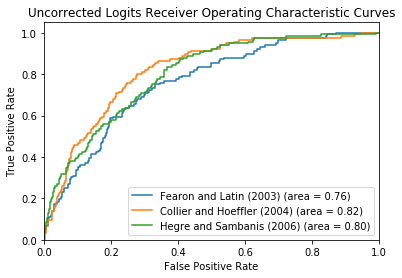

In [9]:
#Plot of a ROC curve for unpenalized modesl
print("Here we plot and compare the different unpenalized models using ROC curves.\n")
print("In the figure below, we see that we were able to replicate the results from the paper for the unpenalized case, with 'Collier and Hoeffler' having the largest area = 0.82.\n")

plt.figure()
plt.plot(fpr_1_unpen, tpr_1_unpen, label ='Fearon and Latin (2003) (area = %0.2f)' % roc_auc_1_unpen)
plt.plot(fpr_2_unpen, tpr_2_unpen, label ='Collier and Hoeffler (2004) (area = %0.2f)' % roc_auc_2_unpen)
plt.plot(fpr_3_unpen, tpr_3_unpen, label ='Hegre and Sambanis (2006) (area = %0.2f)' % roc_auc_3_unpen)
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Uncorrected Logits Receiver Operating Characteristic Curves')
plt.legend(loc="lower right")
plt.show()

Here we plot and compare the different penalized models using ROC curves.

In the figure below, we see that we were able to replicate the results from the paper for the penalized case (L2 regularization), with 'Fearon and Latin' and 'Hegre and Sambanis' models showing no changes compared to their unpenalized versions.

Only for 'Collier and Hoeffler' logistic regression model, the AUC score decreased compared to the unpenalized version of the model



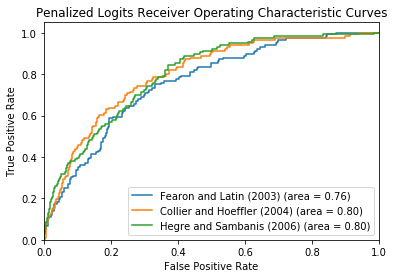

In [8]:
#Plot of a ROC curve for unpenalized modesl
print("Here we plot and compare the different penalized models using ROC curves.\n")
print("In the figure below, we see that we were able to replicate the results from the paper for the penalized case (L2 regularization), with 'Fearon and Latin' and 'Hegre and Sambanis' models showing no changes compared to their unpenalized versions.\n")
print("Only for 'Collier and Hoeffler' logistic regression model, the AUC score decreased compared to the unpenalized version of the model\n")

plt.figure()
plt.plot(fpr_1_pen, tpr_1_pen, label ='Fearon and Latin (2003) (area = %0.2f)' % roc_auc_1_pen)
plt.plot(fpr_2_pen, tpr_2_pen, label ='Collier and Hoeffler (2004) (area = %0.2f)' % roc_auc_2_pen)
plt.plot(fpr_3_pen, tpr_3_pen, label ='Hegre and Sambanis (2006) (area = %0.2f)' % roc_auc_3_pen)
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Penalized Logits Receiver Operating Characteristic Curves')
plt.legend(loc="lower right")
plt.show()

# Project Milestone 4: Part B

In [2]:
X = CWD[["ager", "agexp", "anoc", "army85", "autch98", "auto4", "autonomy", "avgnabo", "centpol3", "coldwar", "decade1", "decade2", "decade3", "decade4", "dem", "dem4","demch98", "dlang","drel", "durable", "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590", "expgdp", "exrec", "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2", "geo34", "geo57", "geo69", "geo8", "illiteracy", "incumb", "infant", "inst", "inst3", "life", "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper", "mirps0", "mirps1", "mirps2", "mirps3", "nat_war", "ncontig", "nmgdp", "nmdp4_alt","numlang", "nwstate", "oil", "p4mchg", "parcomp", "parreg", "part", "partfree", "plural", "plurrel", "pol4", "pol4m", "pol4sq", "polch98","polcomp", "popdense", "presi", "pri", "proxregc", "ptime", "reg", "regd4_alt", "relfrac", "seceduc","second", "semipol3", "sip2", "sxpnew", "sxpsq", "tnatwar", "trade", "warhist", "xconst"]].copy()

y = CWD["warstds"].copy()

In [114]:
X = CWD[["ager", "agexp", "anoc", "dem", "dem4","dlang", "ef", "ef2", "ehet", "elfo", "elfo2", "expgdp","fuelexp", "gdpgrowth", "geo1", "illiteracy", "infant", "inst", "inst3", "life", "lmtnest", "ln_gdpen", "lpopns", "manuexp", "milper", "mirps0", "mirps1", "mirps2", "mirps3", "nmgdp", "nmdp4_alt", "p4mchg", "part", "partfree", "pol4", "pol4m", "pol4sq", "popdense", "pri", "reg", "regd4_alt", "relfrac", "seceduc", "sip2", "sxpnew", "sxpsq", "trade"]].fillna(0).copy()

In [126]:
X = CWD[["anoc", "dem", "dem4","dlang", "ef", "ehet", "elfo", "expgdp", "gdpgrowth", "geo1", "illiteracy", "infant", "inst3", "life", "lmtnest", "ln_gdpen", "lpopns", "manuexp", "milper", "mirps3", "part", "pol4", "popdense", "reg", "regd4_alt", "seceduc", "sip2", "sxpnew", "sxpsq", "trade"]].fillna(0).copy()

In [127]:
scaler_RF = StandardScaler().fit(X)
X_RF = scaler_RF.transform(X) 

clf = RandomForestClassifier(n_estimators=1000, criterion='gini', oob_score = True,random_state=42) #class_weight = 'balanced_subsample', max_features = 20, 
clf.fit(X_RF, y)
features_gini = clf.feature_importances_
print(features_gini)

[0.00576119 0.00252497 0.01310685 0.01709662 0.02274054 0.02015304
 0.0218635  0.05264187 0.05561031 0.00035057 0.06363186 0.04128508
 0.01728941 0.03699193 0.02127141 0.04344766 0.05223243 0.05585011
 0.05263632 0.00808435 0.00631679 0.01930343 0.0482305  0.00735673
 0.01947005 0.03602948 0.02390471 0.08515765 0.09358839 0.05607225]


In [128]:
in_max_20 = np.array(features_gini.argsort()[-20:][::-1])
print(in_max_20)
print(X.columns[in_max_20])

[28 27 10 29 17  8  7 18 16 22 15 11 13 25 26  4  6 14  5 24]
Index(['sxpsq', 'sxpnew', 'illiteracy', 'trade', 'manuexp', 'gdpgrowth',
       'expgdp', 'milper', 'lpopns', 'popdense', 'ln_gdpen', 'infant', 'life',
       'seceduc', 'sip2', 'ef', 'elfo', 'lmtnest', 'ehet', 'regd4_alt'],
      dtype='object')


In [130]:
print(features_gini[in_max_20].max())
print(features_gini[in_max_20].min())

0.0935883887378488
0.0194700534925143


In [131]:
imp_features = features_gini[in_max_20]/features_gini[in_max_20].min()
imp_features

array([4.80678642, 4.37377583, 3.26819128, 2.87992282, 2.86851322,
       2.85619726, 2.70373514, 2.70345008, 2.68270619, 2.47716314,
       2.23151198, 2.12044017, 1.89993966, 1.85050773, 1.22776809,
       1.16797516, 1.12292946, 1.09251955, 1.03507891, 1.        ])

In [132]:
clf.oob_score_

0.9841736694677871

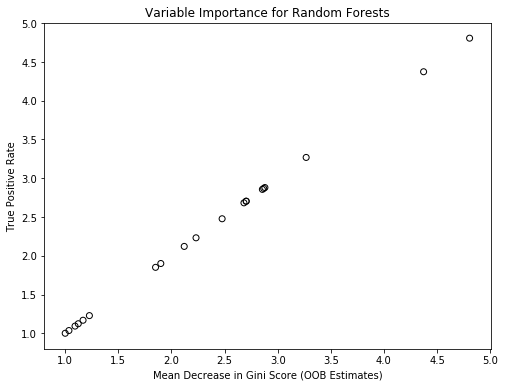

In [133]:
plt.figure(figsize=[8,6])
# plt.figure()
plt.scatter(imp_features, imp_features, marker = 'o',facecolors='none',edgecolors='black')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('Mean Decrease in Gini Score (OOB Estimates)')
plt.ylabel('True Positive Rate')
plt.title('Variable Importance for Random Forests')
# plt.legend(loc="lower right")
plt.show()

In [ ]:
def KNN_train(to_classify, neighbors, test_size):
    
    X_train = to_classify[features]
    y_train = to_classify['labels']
    model = KNeighborsClassifier(n_neighbors = neighbors)
    # X_train, X_test, y_train, y_test = train_test_split(to_classify[features], y_labels, test_size=test_size, shuffle=True,random_state=42)
    # index_testset = y_test.index
    
    #scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
    # kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
    # cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5) #scoring='accuracy'
    # The mean score and the 95% confidence interval of the score estimate are hence given by:
    mean_accuracy = cv_scores.mean()
    #print("Mean Accuracy and 95 %% confidence interval of the score estimate: %0.2f (+/- %0.2f)" % (mean_accuracy, cv_scores.std() * 2))
    #print('Scores of CV', cv_scores)
    KNN = model.fit(X_train, y_train)
    #print(y_test)
    # y_pred = KNN.predict(X_test)
    #print(KNN.classes_)
    #print(KNN.effective_metric_)
    # print(classification_report(y_test, y_pred))
    # print(KNN.score(X_test, y_test))      # Return the mean accuracy on the given test data and labels
    return KNN, mean_accuracy #, index_testset

In [ ]:
def KNN_predict(test_data):
    
    var_all = test_data[strings]
    var_all = var_all.div(var_all.max(axis = 1), axis = 0) # normalize for each window
    y_pred = KNN.predict(var_all)

    return y_pred

In [ ]:
model_score = pd.DataFrame()

k_min = 1
k_max = 21

neighbors = np.empty(len(range(k_min,k_max)), dtype=object)
threshold = np.empty(len(range(k_min,k_max)), dtype=object)
train_accuracy = np.empty(len(range(k_min,k_max)), dtype=object)
test_accuracy = np.empty(len(range(k_min,k_max)), dtype=object)

#subjects_to_test = all_subjects_all[0:47].copy()                      # use when testing classifier on the whole dataset
subjects_to_test = all_subjects_all[0:3].copy()                        # test subject 1 (instance = 3,4,5,6)
subjects_to_test.append(all_subjects_all[33])
y_labels = np.array([dic_classes['T'], dic_classes['R'], dic_classes['SW'], dic_classes['L']])                                  

# original_data = generate_test_data(subjects_to_test, 0, 1799)
# subjects = original_data['subject']
# instances = original_data['instance']
# y_labels = to_classify['labels'][(to_classify['subject'].isin(subjects)) & (to_classify['instance'].isin(instances))].values.copy() 

#subjects_to_test = [all_subjects_all[i] for i in index_list] 
# subjects_to_test = [to_classify.loc[i] for i in index_list] 
# y_labels = [to_classify.loc[i]['labels'] for i in index_list]  

# Set up to call classifier function periodically
l = len(subjects_to_test)
c = np.zeros(l, dtype=object)                          # correctly classified time slice
f = np.zeros(l, dtype=object)                          # falsly classified time slice
ths = 3                                                # mean veloicty threshold to hold class label
w = 5                                                  # length of sliding  window to classify (e.g 20 samples)  w > r !
r = 5                                                  # resolution for sliding window = frequency of classifying (every 5 samples())
#frames_fixed = np.linspace(50,1750, int(1700/w +1))   # generate test data for a window of w samples, every w samples 
#frames = frames_fixed.copy().astype(int)
frames_sliding = np.linspace(50,1750, int(1700/r +1))[:-int(w/r)] # sliding window, generate features for a window of 20 samples every 5 samples 
frames = frames_sliding.copy().astype(int)

predictions_old = np.ones(l)

for idx, i in enumerate(range(k_min, k_max)):
    [KNN, accuracy] = KNN_train(to_classify_train, neighbors = i, test_size = 0)
    # print(i)
    for index, start in enumerate(frames[:-1]):
        data_to_test = generate_test_data(subjects_to_test, start, w + start)
        #data_to_test['timestamp'] = start 
        predictions = KNN_predict(data_to_test)

        data_to_test['mean_vel'] = data_to_test[features].mean(axis = 1) 
        hold_idx = np.where(data_to_test['mean_vel'] < ths)
        predictions[hold_idx] = predictions_old[hold_idx]
        # calculate total number of correctly/falsly classified time slices for each test subject
        for j in range(len(predictions)):
            if predictions[j] == y_labels[j]: c[j] = c[j] + 1 
            else: f[j] = f[j] + 1

        predictions_old = predictions.copy()
        
    neighbors[idx] = i
    threshold[idx] = ths
    train_accuracy[idx] = accuracy    
    test_accuracy[idx] = np.mean(c/(f+c))
    print(c/(f+c))    
model_score['neighbors'] = neighbors
model_score['threshold'] = ths
model_score['train accuracy'] = train_accuracy
model_score['test accuracy'] = test_accuracy
#model_score

In [ ]:
%matplotlib inline

k_neighbors = model_score['neighbors']
ax = plt.figure(figsize=[10,10])
plt.ylabel('Accuracy Score [%]', fontsize=16)
plt.xlabel('Number of Neighbors', fontsize=16)
plt.title('KNN Analysis', fontsize=20)
plt.style.context('seaborn-whitegrid')

plt.plot(k_neighbors, model_score['train accuracy']*100, label = 'Training',color ='blue')

plt.plot(k_neighbors, with_thresh_20['test accuracy']*100, label ='Testing (window = 20, velocity threshold = 3)', color = 'green')
plt.plot(k_neighbors, with_thresh_10['test accuracy']*100, label ='Testing (window = 10, velocity threshold = 3)', color = 'red')
plt.plot(k_neighbors, with_thresh_5['test accuracy']*100, label ='Testing (window = 5, velocity threshold = 3)', color = 'cyan')

plt.plot(k_neighbors, wo_thresh_20['test accuracy']*100, label ='Testing (window = 20, velocity threshold = 0)', color = 'orange')
plt.plot(k_neighbors, wo_thresh_10['test accuracy']*100, label ='Testing (window = 10, velocity threshold = 0)', color = 'magenta')
plt.plot(k_neighbors, wo_thresh_5['test accuracy']*100, label ='Testing (window = 5, velocity threshold = 0)', color = 'olive')

plt.xticks(np.arange(min(k_neighbors), max(k_neighbors)+1, 1), fontsize = 14)
plt.yticks(np.arange(0, 101, 5), fontsize = 14)
ax = plt.gca()
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

plt.grid()
plt.legend(loc = 7, fontsize = 13)
plt.show()